# Deaths by tuberculosis

This notebook is part of [_The Joy of Jupyter_](https://github.com/mwermelinger/The-Joy-of-Jupyter), which explains how to use and publish Jupyter Notebooks.

This notebook is based on the project notebook for Week 1 of [_Learn to Code for Data Analysis_](https://github.com/mwermelinger/Learn-to-code-for-data-analysis).

This notebook illustrates how a handful lines of code are enough to load and visualise data from Excel files, select the rows of interest, and do simple computations on columns to analyse the data. 

## 1. Research questions

In 2000, the United Nations set eight Millenium Development Goals (MDGs) to reduce poverty and diseases, improve gender equality and environmental sustainability, etc. Each goal is quantified and time-bound, to be achieved by the end of 2015. Goal 6 is to have halted and started reversing the spread of HIV, malaria and [tuberculosis](https://en.wikipedia.org/wiki/Tuberculosis) (TB).
TB doesn't make headlines like Ebola, SARS (severe acute respiratory syndrome) and other epidemics, but is far deadlier. For more information, see the World Health Organisation (WHO) page <http://www.who.int/gho/tb/en/>.

Given the population and number of deaths due to TB in some countries during one year, the following questions will be answered: 

- What is the total, maximum, minimum and average number of deaths in that year?
- Which countries have the most and the least deaths?
- What is the death rate (deaths per 100,000 inhabitants) for each country?
- Which countries have the lowest and highest death rate?

The death rate allows for a better comparison of countries with widely different population sizes.

## 2. The data

The data consists of total population and total number of deaths due to TB (excluding HIV) in 2013 in every country.  

The data was taken in July 2015 from <http://apps.who.int/gho/data/node.main.POP107?lang=en> (population) and <http://apps.who.int/gho/data/node.main.1317?lang=en> (deaths). The uncertainty bounds of the number of deaths were ignored.

The data was collected into an Excel file which should be in the same folder as this notebook.

In [1]:
from pandas import *
world = read_excel('WHO POP TB.xls')
world.head()

,Country,Population (1000s),TB deaths
0,Afghanistan,30552,13000.00
1,Albania,3173,20.00
2,Algeria,39208,5100.00
3,Andorra,79,0.26
4,Angola,21472,6900.00


**Activity:** In the paragraph above, click on one of the links to the source data (population or deaths). For the countries shown in the table, compare the values in the table to the values on the WHO site for the year 2013. You will notice that some may be the same, but others can be quite different. The reason is that many of the values are estimates, and WHO updates the estimates, even for past years, as it collects more data.  

**Activity:** In the code cell above, change `head()` to `head(3)` or some other number. Press Ctrl-Enter (or click the play button in the menu bar) to run the cell. You should now see only the first 3 rows of the table. Then replace `head` by `tail` to see the _last_ 3 rows of the table. Don't forget to press Ctrl-Enter to run the code after you changed it.

The analysis will be restricted to the [BRICS countries](https://en.wikipedia.org/wiki/BRICS): Brazil, Russia, India, China, South Africa.

In [2]:
countries = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
rows = world['Country'].isin(countries)
selection = world[rows]
selection

,Country,Population (1000s),TB deaths
23,Brazil,200362,4400.0
36,China,1393337,41000.0
77,India,1252140,240000.0
141,Russian Federation,142834,17000.0
159,South Africa,52776,25000.0


## 3. The range of the problem

The values of interest are in the right-most column.

In [3]:
tbSelected = selection['TB deaths']

The total number of deaths in 2013 is:

In [4]:
tbSelected.sum()

327400.0

The largest and smallest number of deaths in a single country are:

In [5]:
tbSelected.max()

240000.0

In [6]:
tbSelected.min()

4400.0

The average number of deaths per country can give a better idea of the seriousness of the problem in each country.
The average can be computed as the mean or the median. 
The **mean** is the total of deaths divided by the number of countries.
There is one country per row, so the number of rows is the number of rows, which is the length of the table.

In [7]:
tbSelected.sum() / len(tbSelected)

65480.0

There is an operation that calculates the mean directly.

In [8]:
tbSelected.mean()

65480.0

The **median** is another way of measuring what is average.
The median is the value in the middle of the range. Half of the values are below the median, half are above.

In [9]:
tbSelected.median()

25000.0

The median is far lower than the mean. This indicates that some of the countries had a very high number of TB deaths in 2013, pushing the value of the mean up. Given the wide range of deaths (see the minimum and maximum values), the median is probably a more sensible average measure.

## 4. The most affected

To see the most affected countries, the table is sorted in ascending order by the 'TB deaths' column, which puts those countries in the last rows.

In [10]:
selection.sort_values('TB deaths')

,Country,Population (1000s),TB deaths
23,Brazil,200362,4400.0
141,Russian Federation,142834,17000.0
159,South Africa,52776,25000.0
36,China,1393337,41000.0
77,India,1252140,240000.0


It is also possible to sort the table in descending order, so that the most affected country comes first.

In [11]:
selection.sort_values('TB deaths', ascending=False)

,Country,Population (1000s),TB deaths
77,India,1252140,240000.0
36,China,1393337,41000.0
159,South Africa,52776,25000.0
141,Russian Federation,142834,17000.0
23,Brazil,200362,4400.0


Looking at the table, there's the possibility that a large number of deaths may be partly due to a large population. To compare the countries on an equal footing, the death rate per 100,000 inhabitants is computed for all countries and added as a new column. Finally, the same countries (rows) as before are selected.

In [12]:
tbAll = world['TB deaths']
populationAll = world['Population (1000s)']
world['TB deaths (per 100,000)'] = tbAll / (populationAll / 100)
selection = world[rows]
selection

,Country,Population (1000s),TB deaths,"TB deaths (per 100,000)"
23,Brazil,200362,4400.0,2.196025
36,China,1393337,41000.0,2.942576
77,India,1252140,240000.0,19.167186
141,Russian Federation,142834,17000.0,11.901928
159,South Africa,52776,25000.0,47.370017


**Activity:** Change the last line of code in the above cell so that the table shows the countries in descending order, by death rate.

The difference between the countries can be seen with a bar chart.

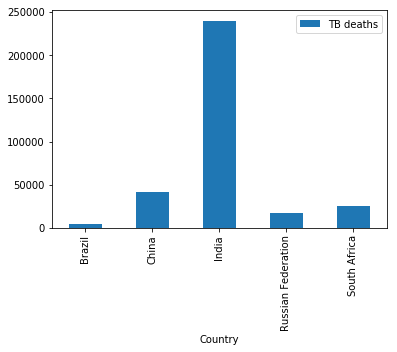

In [13]:
%matplotlib inline
selection.plot(kind='bar', x='Country', y='TB deaths')

**Activity:** Change `'bar'` to `'barh'` to get a horizontal bar chart, then change to `'line'` to see a line chart. 
Does a line chart make sense for this data?

**Activity:** Set kind to `'scatter'` and x to `'Population (1000s)'`. Is there a relationship between population and deaths, i.e. do larger countries have more deaths by TB?

## 5. Conclusions

The BRICS countries had a total of almost 330 thousand deaths due to tuberculosis in 2013. The median shows that half of these countries had 25,000 deaths or less. The much higher mean (over 65,000) indicates that some countries had a very high number. The least affected was Brazil, with 4400 deaths, and the most affected was India with 240 thousand deaths in a single year. However, taking the population size into account, the least affected was Brazil with less than 2.2 deaths per 100 thousand inhabitants, and the most affected was South Africa with over 47 deaths per 100,000 inhabitants.

One should not forget that the mortality values are estimates, and that the chosen countries are a small sample of all the world's countries. Nevertheless, they convey the message that tuberculosis is still a major cause of fatalities, and that there is a huge disparity between countries, with some being highly affected.

## 6. Extensions

Now that you've seen the whole analysis, you can adapt it to your interests. Here are some suggestions. If you publish your changed notebook for others to see, you need to abide by [_The Joy of Jupyter_](https://github.com/mwermelinger/The-Joy-of-Jupyter)'s license.

### 6.1 Different countries

Instead of the BRICS countries, analyse those you are interested in, e.g. countries you have visited or where you have friends and family. You will have to use the same country name as in the Excel file, e.g. the official name of the UK is 'United Kingdom of Great Britain and Northern Ireland'. You may wish to keep at least one of the BRICS countries, so that you can make comparisons. What code needs to be changed in order to analyse other countries? 

After you have changed the code, click on 'Run All' in the Cell menu and go through the notebook to see how the results changed. Discuss the results with your colleagues. Don't forget to change the conclusions text so that it reflects the new choice of countries.

### 6.2 All countries

The Excel file includes all the world's countries. Change the code so that the selection is all countries. Then run all the code and change the conclusions accordingly. 

### 6.3 More recent data

The provided Excel file has data about 2013. Follow the links to the population and TB deaths pages on the WHO website, and download the most recent data. You will have two files, each with several columns. Use Excel to create a file that has the 3 columns needed for the analysis: countries, population in thousands and TB deaths. Change the code to read your file instead of ours, run all cells, and change the conclusions as needed.

### 6.4 Comparative analysis

You can of course duplicate the code so that it loads both Excel files and analyses the 2013 _and_ the more recent data in the same notebook. Your conclusions can then reflect on whether the overall situation improved, if it deteriorated in some countries, etc.

### 6.5 Something completely different

Search online for open data on some topic that interests you. It can be data about the whole world, a single country, or even data from your local council about where you live. See if they provide the data in Excel or CSV format. CSV files can be opened in Excel and then saved as Excel files. Change this notebook so that it uses the column names of the file you downloaded.